In [ ]:
# Standard library imports
import warnings
import os
# Third-party imports for data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Audio processing library
import librosa
import librosa.display

# Machine learning preprocessing and model selection
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers

# Statistical distributions for randomized search
from scipy.stats import loguniform, randint

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Set up the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Ensure that plots are displayed in the Jupyter Notebook
%matplotlib inline

In [ ]:
audio_path = "/content/drive/MyDrive/Data/genres_original/pop/pop.00005.wav"
audio, sr = librosa.load(audio_path)

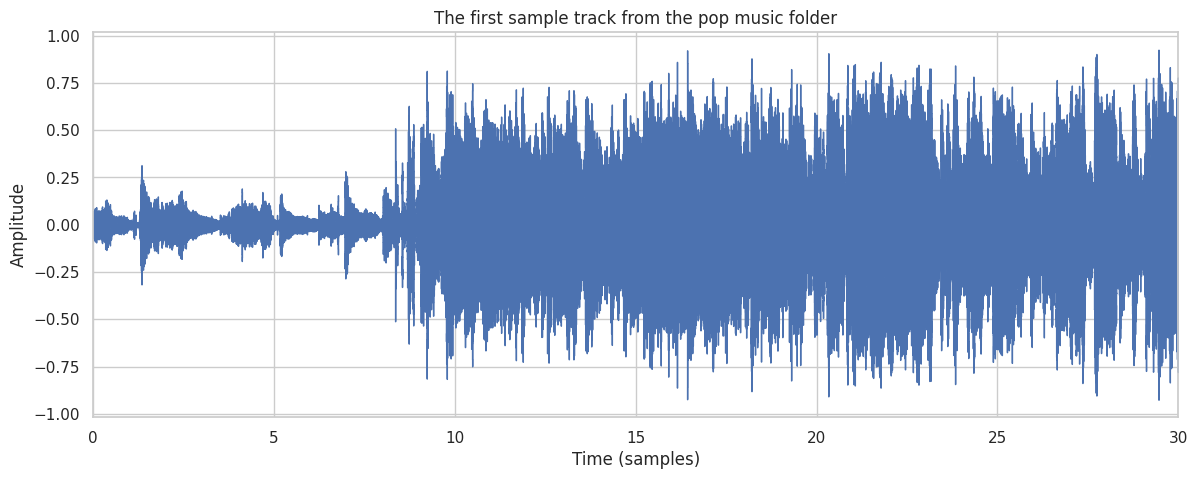

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('The first sample track from the pop music folder')
plt.xlim([0,30])
plt.show()

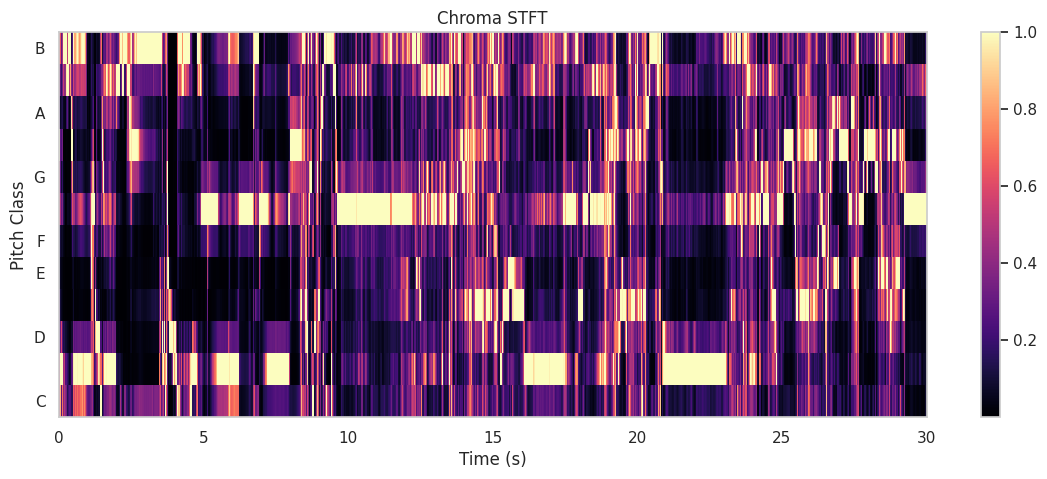

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', sr=sr)
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.title('Chroma STFT')
plt.show()

In [ ]:
rms = librosa.feature.rms(y=audio)
rms_mean = rms.mean()

print("RMS Mean:", rms_mean)

RMS Mean: 0.13958415


In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
spectral_centroids_mean = spectral_centroids.mean()

print("Spectral Centroid Mean:", spectral_centroids_mean)

Spectral Centroid Mean: 2290.14021271062


<ipython-input-9-e899ec0d6895>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


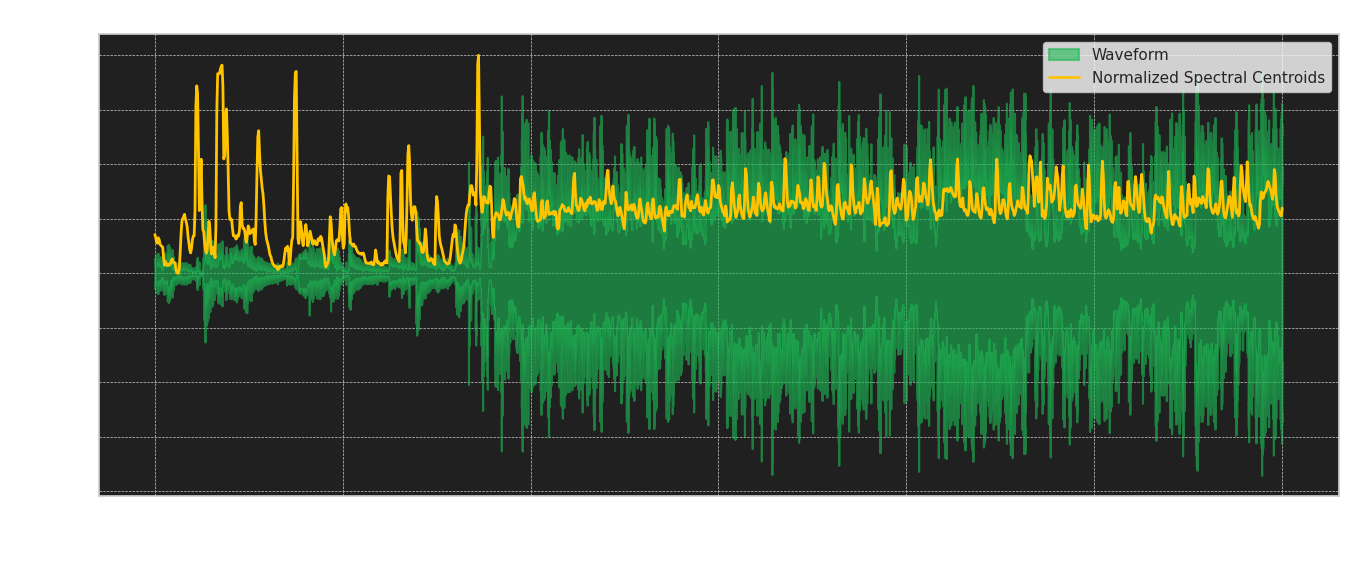

In [ ]:
# Calculate the spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)

# Computing the time variable for visualization
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Use a stylish plot theme
plt.style.use('seaborn-dark-palette')

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  # Set a dark background color

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

# Spectral centroids plot
plt.plot(t, normalize(spectral_centroids[0]), color='#FFC300', linewidth=2, label='Normalized Spectral Centroids')

# Enhancing the plot
plt.title('Waveform and Normalized Spectral Centroids', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

In [ ]:
spectral_bandwidths = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
spectral_bandwidths_mean = spectral_bandwidths.mean()

print("Spectral Bandwidth Mean:", spectral_bandwidths_mean)

Spectral Bandwidth Mean: 2436.188548647075


In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
spectral_rolloff_mean = spectral_rolloff.mean()

print("Spectral Rolloff Mean:", spectral_rolloff_mean)

Spectral Rolloff Mean: 4748.687475076131


<ipython-input-12-c17fc44b07e3>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


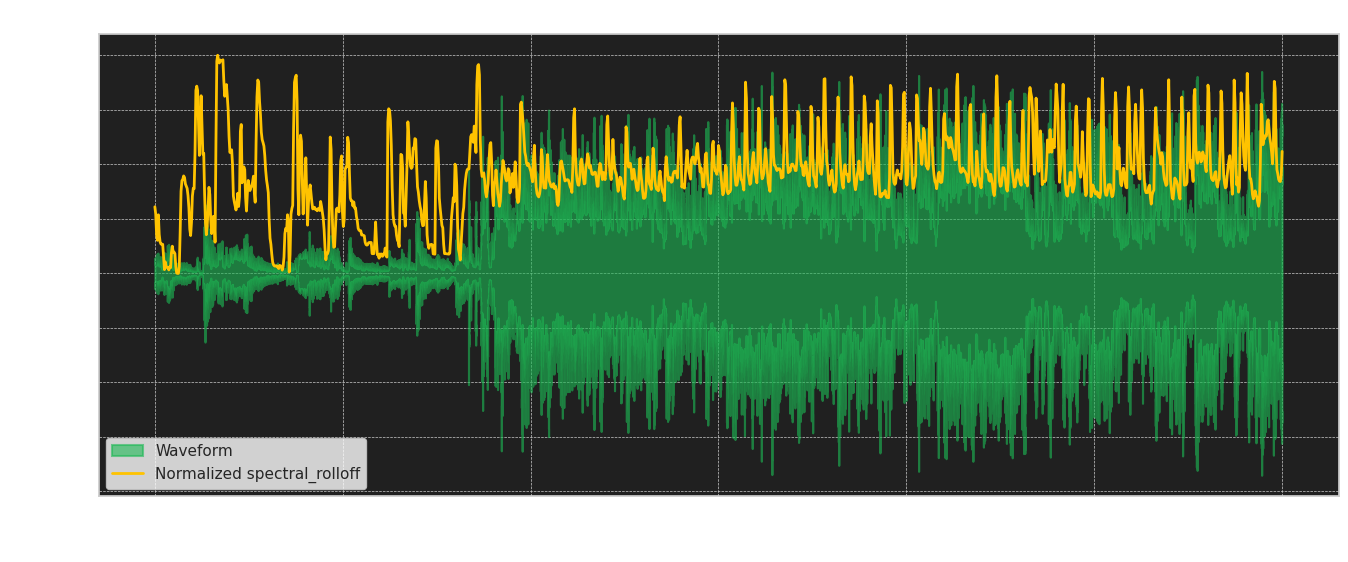

In [ ]:
# Computing the time variable for visualization
frames = range(len(spectral_rolloff [0]))
t = librosa.frames_to_time(frames, sr=sr)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Use a stylish plot theme
plt.style.use('seaborn-dark-palette')

# Plotting the spectral_rolloff along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  # Set a dark background color

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

# chroma_cens plot
plt.plot(t, normalize(spectral_rolloff[0]), color='#FFC300', linewidth=2, label='Normalized spectral_rolloff')

# Enhancing the plot
plt.title('Waveform and Normalized spectral_rolloff', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

In [ ]:
zero_crossing_rates = librosa.feature.zero_crossing_rate(y=audio)
zero_crossing_rates_mean = zero_crossing_rates.mean()

print("Zero-Crossing Rate Mean:", zero_crossing_rates_mean)

Zero-Crossing Rate Mean: 0.10673155935808198


In [ ]:
chroma_cens = librosa.feature.chroma_cens(y=audio, sr=sr)
harmony_mean = chroma_cens.mean()

print("Harmony Mean:", harmony_mean)

Harmony Mean: 0.24800918


<ipython-input-15-742fcbb38a5d>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


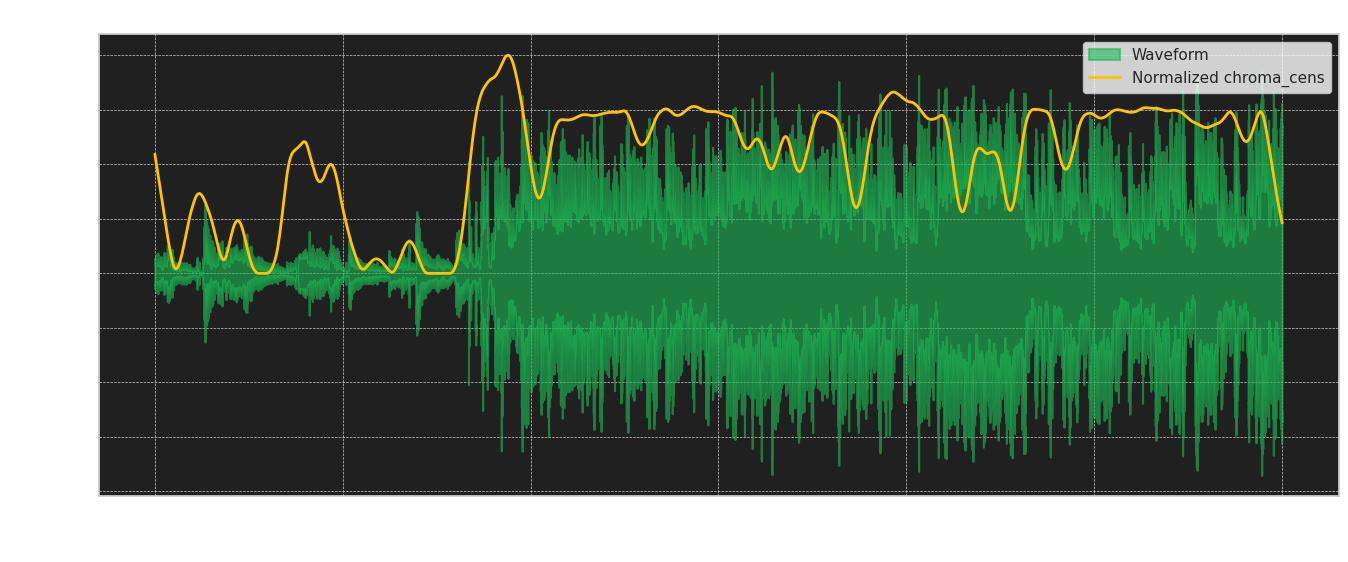

In [ ]:
# Computing the time variable for visualization
frames = range(len(chroma_cens[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Use a stylish plot theme
plt.style.use('seaborn-dark-palette')

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  # Set a dark background color

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

# chroma_cens plot
plt.plot(t, normalize(chroma_cens[0]), color='#FFC300', linewidth=2, label='Normalized chroma_cens')

# Enhancing the plot
plt.title('Waveform and Normalized chroma_cens', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

In [ ]:
tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
tempo_mean = tempo.mean()

print("Tempo Mean (BPM):", tempo_mean)

Tempo Mean (BPM): 172.265625


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


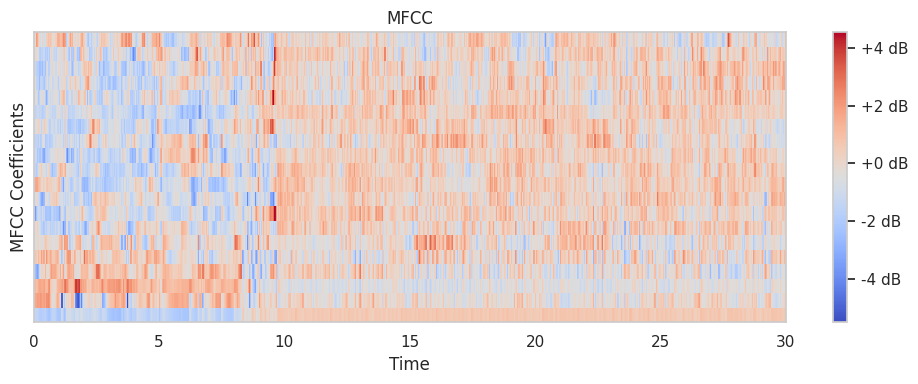

In [ ]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr)

# Apply Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/features_3_sec.csv')

In [ ]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df.shape
df.iloc[1,:]

filename                   blues.00000.1.wav
length                                 66149
chroma_stft_mean                    0.343065
chroma_stft_var                     0.086147
rms_mean                            0.112699
rms_var                              0.00145
spectral_centroid_mean           1816.693777
spectral_centroid_var           90525.690866
spectral_bandwidth_mean          2010.051501
spectral_bandwidth_var          65671.875673
rolloff_mean                     3869.682242
rolloff_var                    672244.760273
zero_crossing_rate_mean             0.087173
zero_crossing_rate_var               0.00103
harmony_mean                       -0.000099
harmony_var                          0.00495
perceptr_mean                      -0.000103
perceptr_var                        0.004854
tempo                             123.046875
mfcc1_mean                       -125.590706
mfcc1_var                        2038.344238
mfcc2_mean                        122.421227
mfcc2_var 

In [ ]:
df.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [ ]:
df = df.drop('filename', axis = 1)

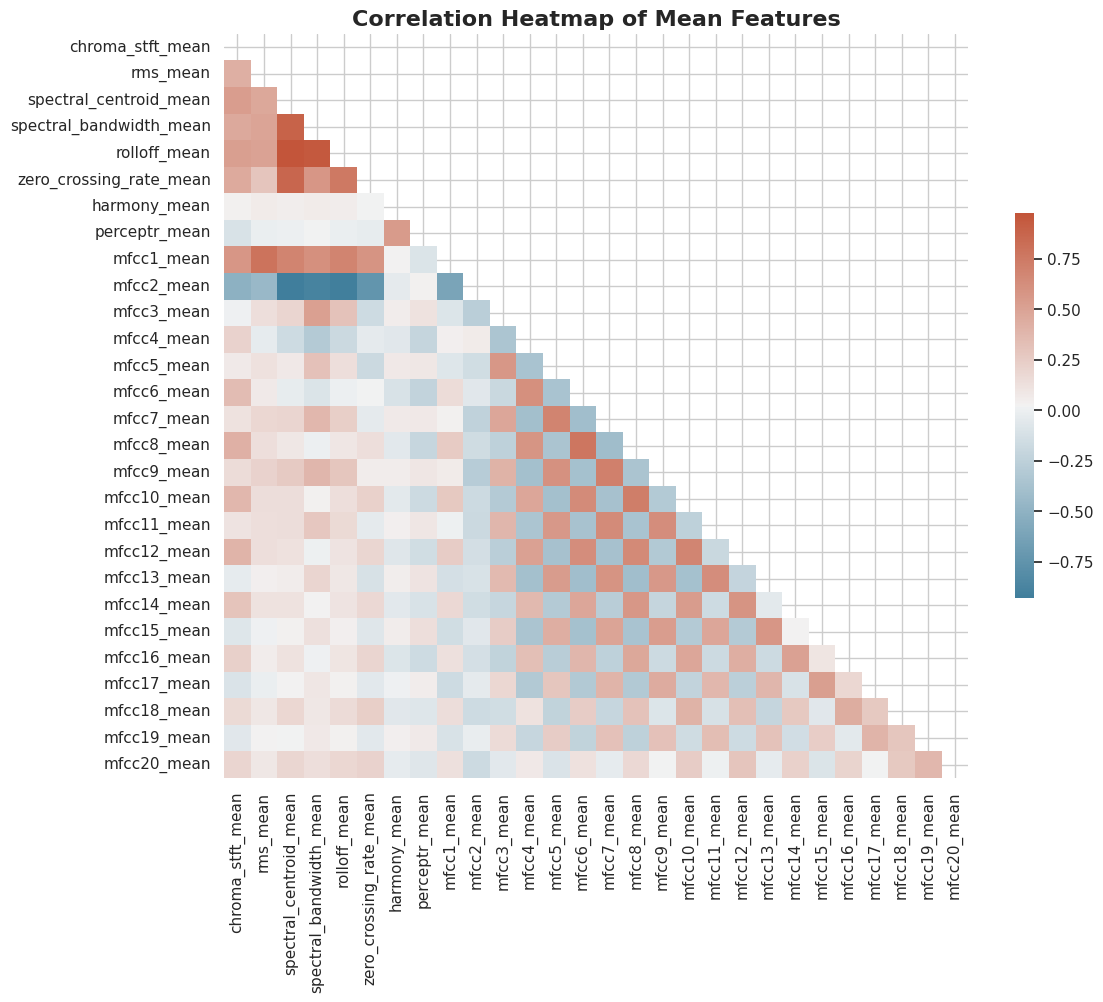

In [ ]:
mean_columns = df.filter(regex='_mean$')

correlation_matrix = mean_columns.corr()

# Create a boolean mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=False, linewidths=0,
            cbar_kws={"shrink": .5}, square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Mean Features', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

<ipython-input-4-648035d689a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="tempo", data=x, palette='husl')


Text(0, 0.5, 'BPM')

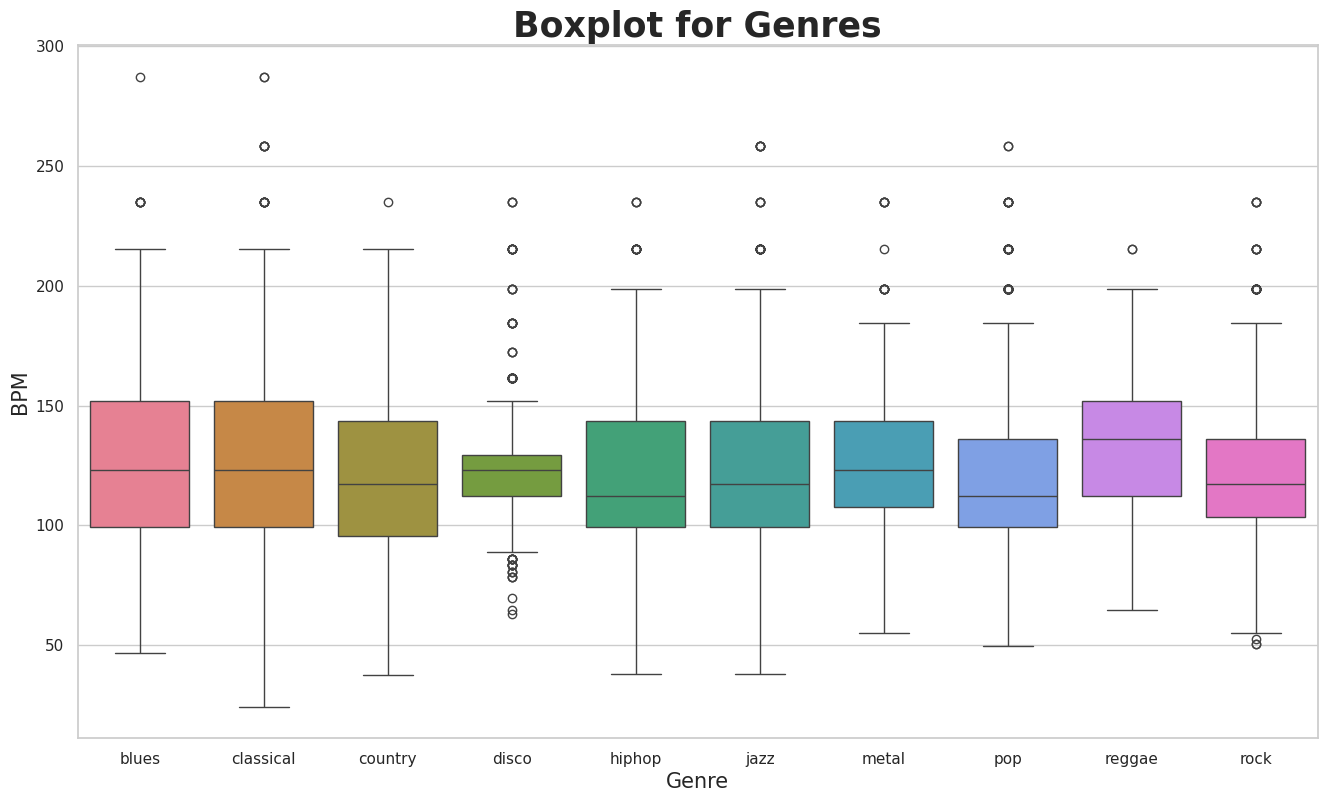

In [ ]:
# Subset the DataFrame to include only the 'label' and 'tempo' columns
x = df[["label", "tempo"]]

# Create the plot
f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

# Styling the plot with titles and labels
plt.title('Boxplot for Genres', fontsize=25, fontweight='bold')
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)

In [ ]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

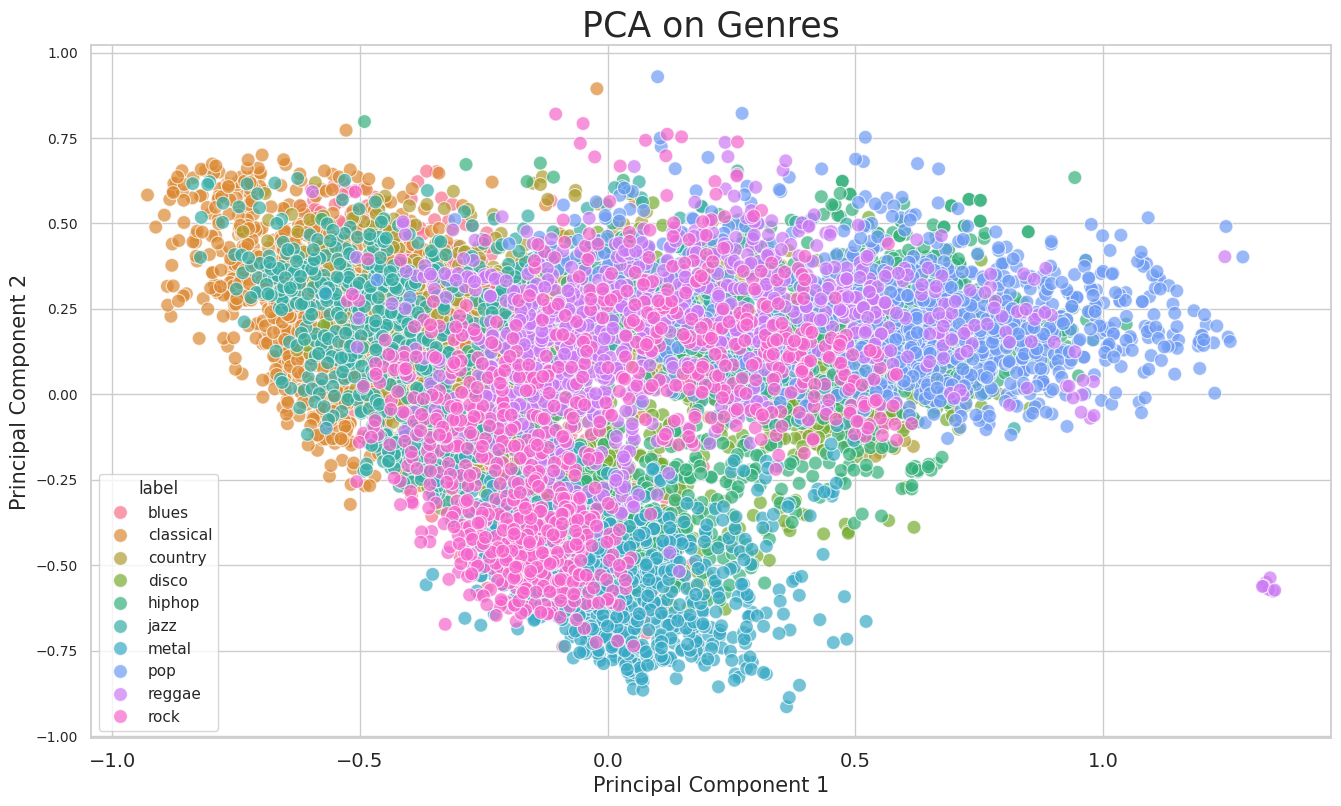

In [ ]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [ ]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale.

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

In [ ]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def model_assess(model, title = "Default"):
    model.fit(X_train_70, y_train_70)
    preds = model.predict(X_test_30)
    print('Accuracy', title, ':', round(accuracy_score(y_test_30, preds), 5), '\n')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=19),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0),
    'Support Vector Machine': SVC(kernel='rbf')
}

# Store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

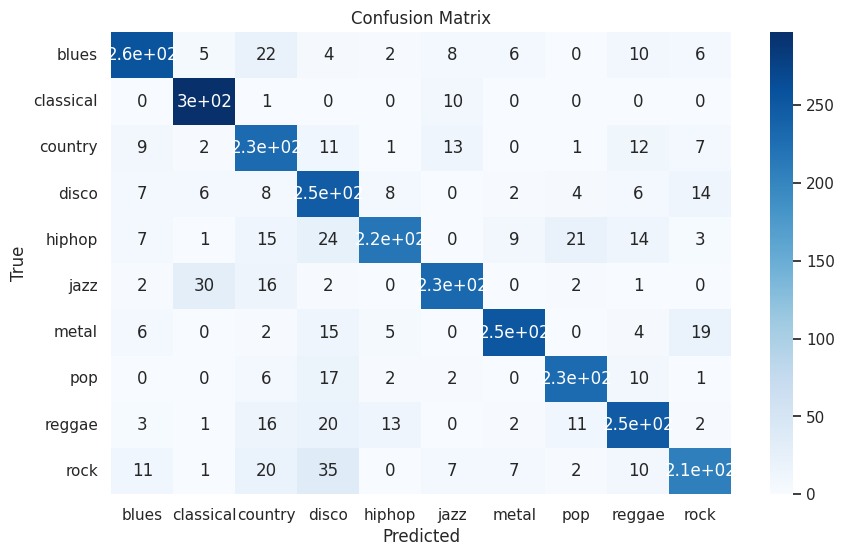

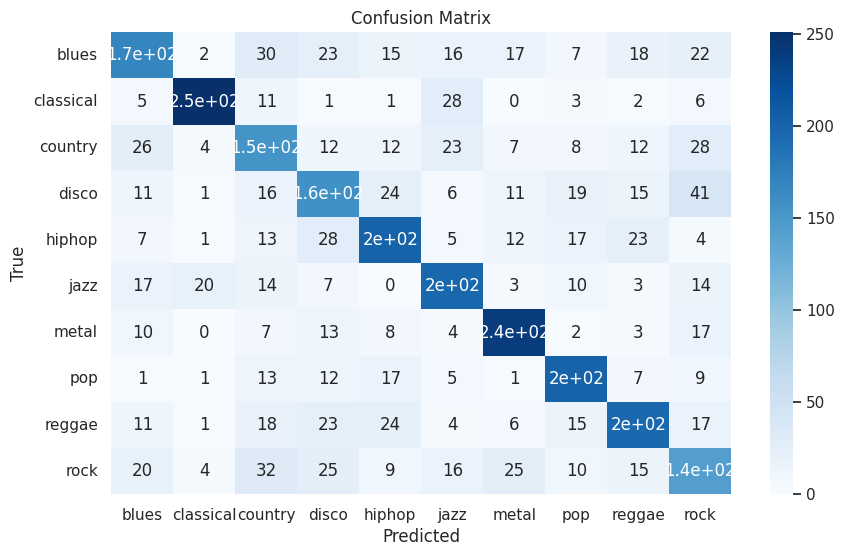

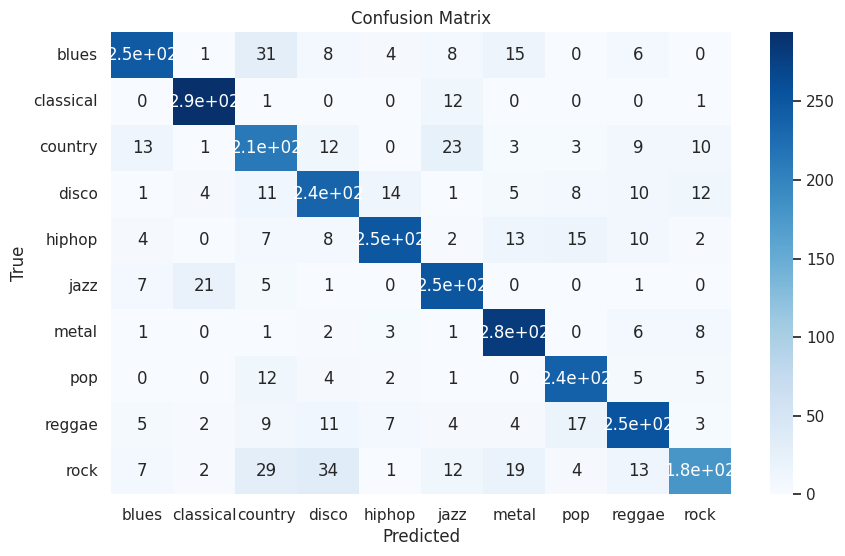

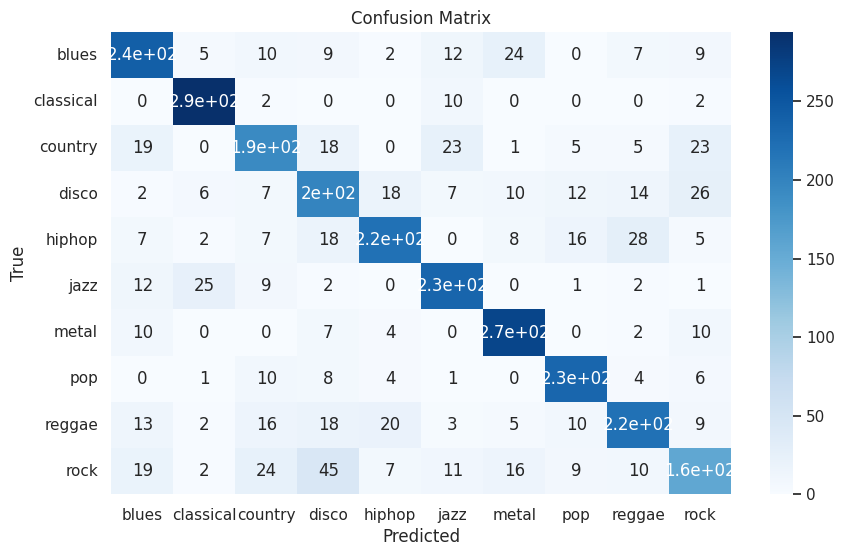

                    Model  Accuracy  Precision    Recall  F1 Scorce
0    KNeighborsClassifier  0.805806   0.813365  0.805806   0.806268
1           Decision Tree  0.637638   0.639308  0.637638   0.637632
2           Random Forest  0.814147   0.816764  0.814147   0.812406
3  Support Vector Machine  0.754087   0.751228  0.754087   0.751084


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Train models and calculate metrics
for name, model in models.items():
    model.fit(X_train_70, y_train_70)
    y_pred = model.predict(X_test_30)
    accuracy = accuracy_score(y_test_30, y_pred)
    precision = precision_score(y_test_30, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_30, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_30, y_pred, average='weighted', zero_division=0)
    confusion_matr = confusion_matrix(y_test_30, y_pred) #normalize = 'true'
    plt.figure(figsize = (10, 6))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True,
                xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Scorce'].append(f1)

# Convert results to DataFrame for better formatting
df_results = pd.DataFrame(results)

# Print results in matrix form
print(df_results)


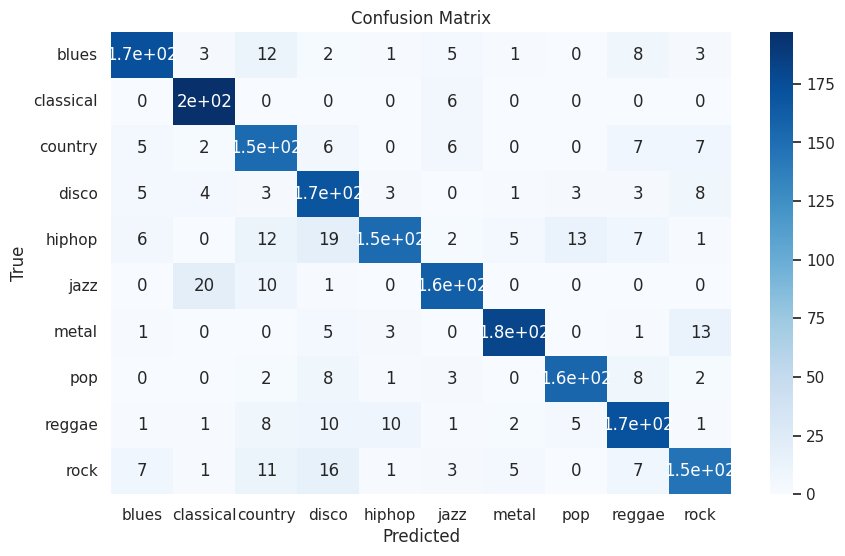

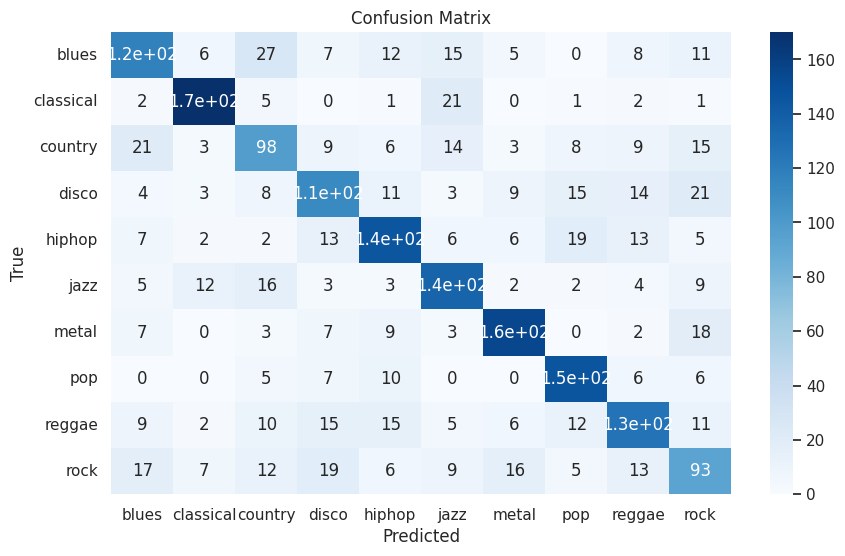

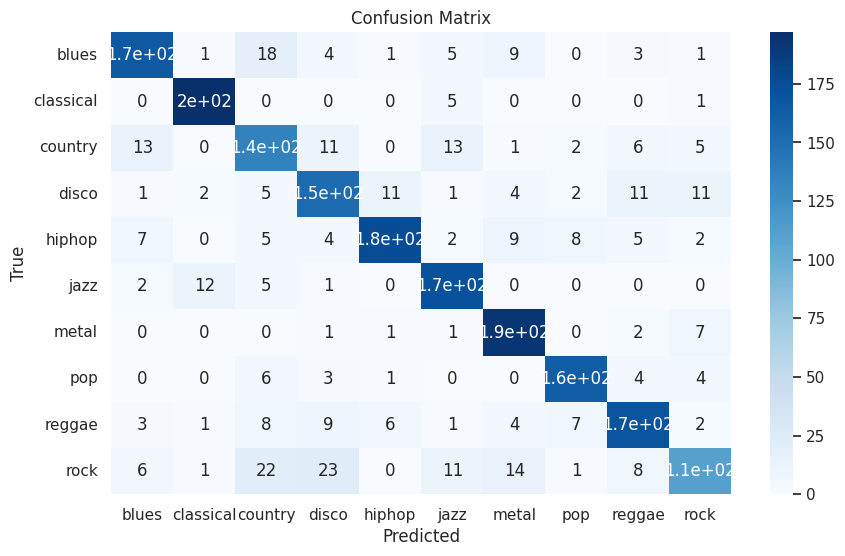

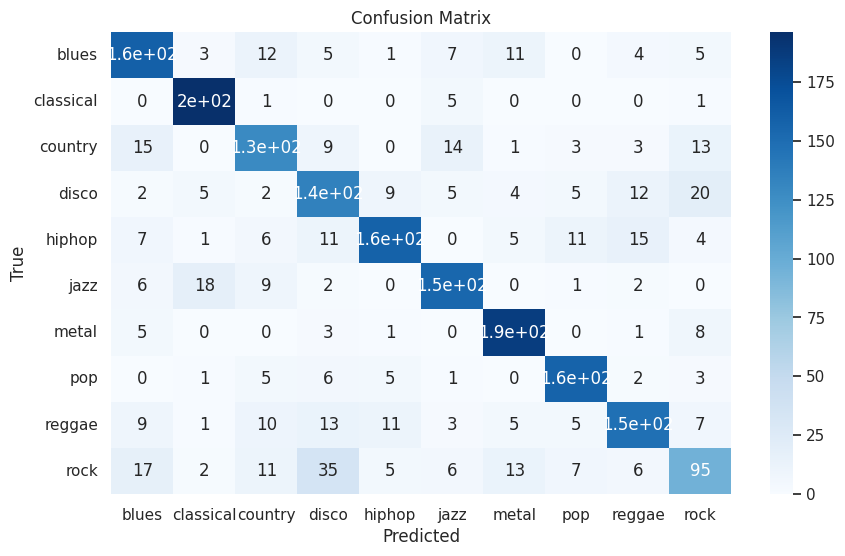

                    Model  Accuracy  Precision    Recall  F1 Scorce
0    KNeighborsClassifier  0.831331   0.836349  0.831331   0.831210
1           Decision Tree  0.649149   0.647239  0.649149   0.647419
2           Random Forest  0.816817   0.817608  0.816817   0.814492
3  Support Vector Machine  0.758759   0.756017  0.758759   0.755317


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Train models and calculate metrics
for name, model in models.items():
    model.fit(X_train_80, y_train_80)
    y_pred = model.predict(X_test_20)
    accuracy = accuracy_score(y_test_20, y_pred)
    precision = precision_score(y_test_20, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_20, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_20, y_pred, average='weighted', zero_division=0)
    confusion_matr = confusion_matrix(y_test_20, y_pred) #normalize = 'true'
    plt.figure(figsize = (10, 6))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True,
                xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Scorce'].append(f1)

# Convert results to DataFrame for better formatting
df_results = pd.DataFrame(results)

# Print results in matrix form
print(df_results)

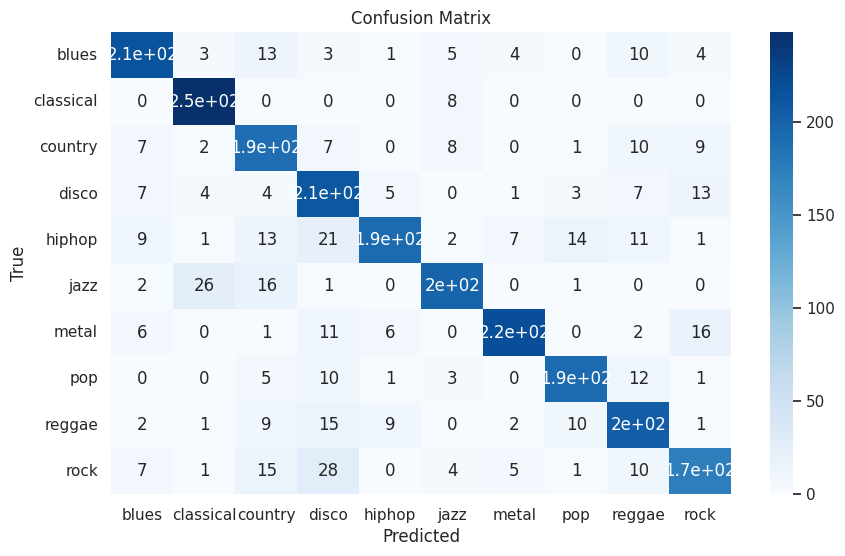

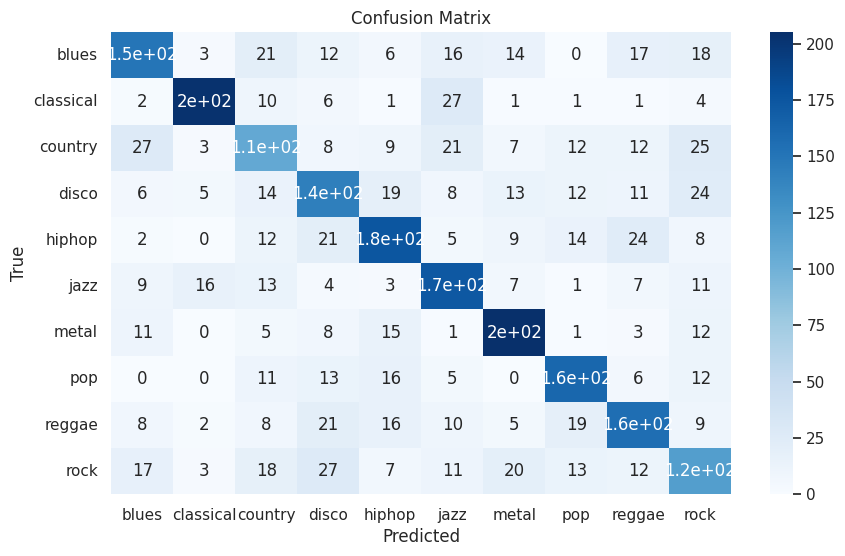

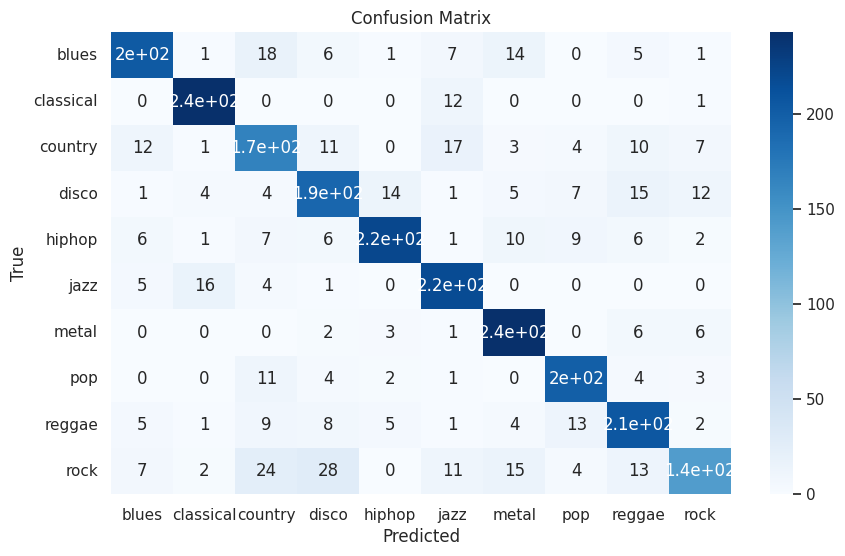

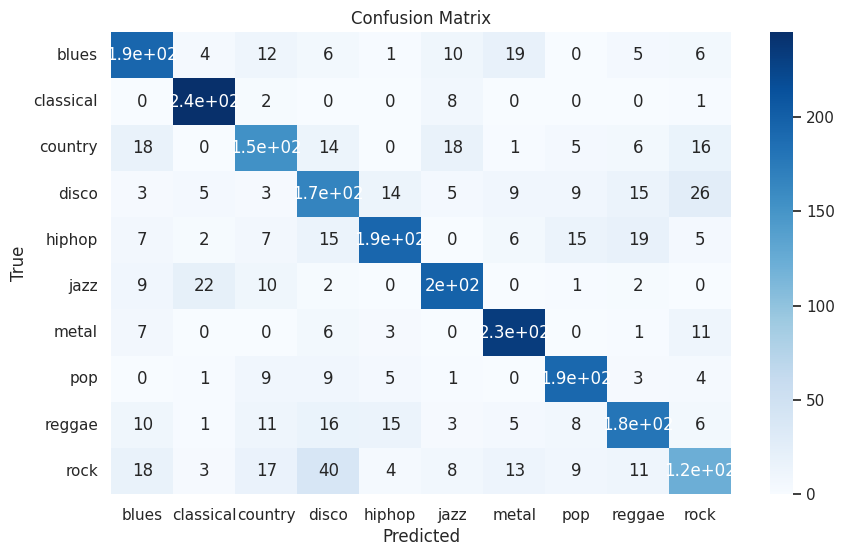

                    Model  Accuracy  Precision    Recall  F1 Scorce
0    KNeighborsClassifier  0.816653   0.823284  0.816653   0.816941
1           Decision Tree  0.636910   0.637430  0.636910   0.636392
2           Random Forest  0.814652   0.815611  0.814652   0.812238
3  Support Vector Machine  0.751401   0.748492  0.751401   0.748239


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Train models and calculate metrics
for name, model in models.items():
    model.fit(X_train_75, y_train_75)
    y_pred = model.predict(X_test_25)
    accuracy = accuracy_score(y_test_25, y_pred)
    precision = precision_score(y_test_25, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_25, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_25, y_pred, average='weighted', zero_division=0)
    confusion_matr = confusion_matrix(y_test_25, y_pred) #normalize = 'true'
    plt.figure(figsize = (10, 6))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True,
                xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Scorce'].append(f1)

# Convert results to DataFrame for better formatting
df_results = pd.DataFrame(results)

# Print results in matrix form
print(df_results)

80-20               Model  Accuracy  Precision    Recall  F1 Score
0    KNeighborsClassifier  0.831331   0.836349  0.831331   0.831210
1           Decision Tree  0.649149   0.647239  0.649149   0.647419
2           Random Forest  0.816817   0.817608  0.816817   0.814492
3  Support Vector Machine  0.758759   0.756017  0.758759   0.755317

70-30               Model  Accuracy  Precision    Recall  F1 Score
0    KNeighborsClassifier  0.805806   0.813365  0.805806   0.806268
1           Decision Tree  0.637638   0.639308  0.637638   0.637632
2           Random Forest  0.814147   0.816764  0.814147   0.812406
3  Support Vector Machine  0.754087   0.751228  0.754087   0.751084

75-25               Model  Accuracy  Precision    Recall  F1 Score
0    KNeighborsClassifier  0.816653   0.823284  0.816653   0.816941
1           Decision Tree  0.636910   0.637430  0.636910   0.636392
2           Random Forest  0.814652   0.815611  0.814652   0.812238
3  Support Vector Machine  0.751401   0.748492  0.751401   0.748239




In [ ]:
labelencoder = LabelEncoder()

y_train_70 = labelencoder.fit_transform(y_train_70)
y_test_30 = labelencoder.transform(y_test_30)
len(labelencoder.classes_)

y_train_80 = labelencoder.fit_transform(y_train_80)
y_test_20 = labelencoder.transform(y_test_20)

y_train_75 = labelencoder.fit_transform(y_train_75)
y_test_25 = labelencoder.transform(y_test_25)

In [ ]:
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
X_train_70 = scaler.fit_transform(X_train_70)
X_test_30 = scaler.transform(X_test_30)

scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
X_train_80 = scaler.fit_transform(X_train_80)
X_test_20 = scaler.transform(X_test_20)

scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
X_train_75 = scaler.fit_transform(X_train_75)
X_test_25 = scaler.transform(X_test_25)

In [ ]:
# Define the parameter distribution for SVM
param_dist_svm = {
    'C': loguniform(1e-4, 1e+1),  # Narrower range for C
    'kernel': ['linear', 'rbf'],  # Only linear and RBF kernels
    # 'gamma': loguniform(1e-4, 1e-3)  # Consider removing if using a linear kernel
}

# Create the SVM classifier and randomized search object
svm = SVC(random_state=42)
random_search_svm = RandomizedSearchCV(
    svm, param_distributions=param_dist_svm, n_iter=50,  # Reduced number of iterations
    scoring='accuracy', n_jobs=-1, random_state=42  # Use all available cores
)
# Fit the randomized search to the data
random_search_svm.fit(X_train_70, y_train_70)

# Evaluate the SVM model with the best parameters on the test set
best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_30)

# Evaluate the SVM model on the training set
y_train_70_pred_svm = best_svm.predict(X_train_70)
train_accuracy_svm = accuracy_score(y_train_70, y_train_70_pred_svm)
test_accuracy_svm = accuracy_score(y_test_30, y_pred_svm)

print("Test Accuracy SVM:", test_accuracy_svm)
print("Train Accuracy SVM:", train_accuracy_svm)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Test Accuracy SVM: 0.9142475809142476
Train Accuracy SVM: 0.9954239954239954


In [ ]:
# Define the parameter grid for the random search
param_grid = {
    'n_neighbors': randint(1, 15),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

# Create the KNN classifier
knn = KNeighborsClassifier()
# Perform the random search
random_search_knn = RandomizedSearchCV(
    knn, param_distributions=param_grid, n_iter=10, cv=5, random_state=42
)
random_search_knn.fit(X_train_70, y_train_70)

# Evaluate the KNN model with the best parameters on the test set
best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_30)
test_accuracy_knn = accuracy_score(y_test_30, y_pred_knn)

# Evaluate the KNN model on the training set
y_train_70_pred_knn = best_knn.predict(X_train_70)
train_accuracy_knn = accuracy_score(y_train_70, y_train_70_pred_knn)

print("Train KNN Accuracy:", train_accuracy_knn)
print("Test KNN Accuracy:", test_accuracy_knn)

Train KNN Accuracy: 0.9992849992849993
Test KNN Accuracy: 0.914914914914915


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=X_train_70.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=len(np.unique(y_train_70)), activation='softmax'))  # Adjusted to use np.unique for flexibility
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15104     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               6

In [ ]:
# Compile the model
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_70, y_train_70, epochs=50, batch_size=32,verbose=2,
                    validation_data=(X_test_30, y_test_30))

Epoch 1/50
219/219 - 7s - loss: 1.9779 - accuracy: 0.2993 - val_loss: 1.4889 - val_accuracy: 0.4508 - 7s/epoch - 34ms/step
Epoch 2/50
219/219 - 1s - loss: 1.4566 - accuracy: 0.4679 - val_loss: 1.2051 - val_accuracy: 0.5536 - 1000ms/epoch - 5ms/step
Epoch 3/50
219/219 - 1s - loss: 1.2819 - accuracy: 0.5331 - val_loss: 1.0773 - val_accuracy: 0.6056 - 978ms/epoch - 4ms/step
Epoch 4/50
219/219 - 1s - loss: 1.1783 - accuracy: 0.5707 - val_loss: 0.9976 - val_accuracy: 0.6510 - 989ms/epoch - 5ms/step
Epoch 5/50
219/219 - 1s - loss: 1.0851 - accuracy: 0.6153 - val_loss: 0.9251 - val_accuracy: 0.6750 - 824ms/epoch - 4ms/step
Epoch 6/50
219/219 - 1s - loss: 1.0157 - accuracy: 0.6362 - val_loss: 0.8658 - val_accuracy: 0.7030 - 821ms/epoch - 4ms/step
Epoch 7/50
219/219 - 1s - loss: 0.9672 - accuracy: 0.6545 - val_loss: 0.8344 - val_accuracy: 0.7124 - 830ms/epoch - 4ms/step
Epoch 8/50
219/219 - 1s - loss: 0.9320 - accuracy: 0.6664 - val_loss: 0.8074 - val_accuracy: 0.7234 - 825ms/epoch - 4ms/step
E

In [ ]:
# Compile the model
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_80, y_train_80, epochs=50, batch_size=32,verbose=2,
                    validation_data=(X_test_20, y_test_20))

Epoch 1/50
250/250 - 5s - loss: 1.9146 - accuracy: 0.3292 - val_loss: 1.4328 - val_accuracy: 0.4735 - 5s/epoch - 20ms/step
Epoch 2/50
250/250 - 1s - loss: 1.4116 - accuracy: 0.4910 - val_loss: 1.1562 - val_accuracy: 0.5961 - 1s/epoch - 5ms/step
Epoch 3/50
250/250 - 2s - loss: 1.2298 - accuracy: 0.5599 - val_loss: 1.0202 - val_accuracy: 0.6441 - 2s/epoch - 8ms/step
Epoch 4/50
250/250 - 2s - loss: 1.1212 - accuracy: 0.6045 - val_loss: 0.9319 - val_accuracy: 0.6792 - 2s/epoch - 8ms/step
Epoch 5/50
250/250 - 1s - loss: 1.0353 - accuracy: 0.6364 - val_loss: 0.8742 - val_accuracy: 0.7017 - 1s/epoch - 6ms/step
Epoch 6/50
250/250 - 1s - loss: 0.9784 - accuracy: 0.6607 - val_loss: 0.8271 - val_accuracy: 0.7162 - 1s/epoch - 5ms/step
Epoch 7/50
250/250 - 1s - loss: 0.9264 - accuracy: 0.6799 - val_loss: 0.7960 - val_accuracy: 0.7352 - 1s/epoch - 6ms/step
Epoch 8/50
250/250 - 2s - loss: 0.8899 - accuracy: 0.6897 - val_loss: 0.7491 - val_accuracy: 0.7482 - 2s/epoch - 6ms/step
Epoch 9/50
250/250 - 2s

In [ ]:
# Compile the model
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history75 = model.fit(X_train_75, y_train_75, epochs=50, batch_size=32,verbose=2,
                    validation_data=(X_test_25, y_test_25))

Epoch 1/50
235/235 - 3s - loss: 0.2944 - accuracy: 0.8971 - val_loss: 0.3022 - val_accuracy: 0.9019 - 3s/epoch - 14ms/step
Epoch 2/50
235/235 - 2s - loss: 0.2745 - accuracy: 0.9026 - val_loss: 0.3009 - val_accuracy: 0.9051 - 2s/epoch - 8ms/step
Epoch 3/50
235/235 - 1s - loss: 0.2816 - accuracy: 0.9016 - val_loss: 0.3009 - val_accuracy: 0.9047 - 1s/epoch - 5ms/step
Epoch 4/50
235/235 - 1s - loss: 0.2731 - accuracy: 0.9068 - val_loss: 0.3040 - val_accuracy: 0.9011 - 860ms/epoch - 4ms/step
Epoch 5/50
235/235 - 1s - loss: 0.2774 - accuracy: 0.9024 - val_loss: 0.2977 - val_accuracy: 0.9043 - 884ms/epoch - 4ms/step
Epoch 6/50
235/235 - 1s - loss: 0.2608 - accuracy: 0.9091 - val_loss: 0.2963 - val_accuracy: 0.9051 - 879ms/epoch - 4ms/step
Epoch 7/50
235/235 - 1s - loss: 0.2581 - accuracy: 0.9100 - val_loss: 0.2914 - val_accuracy: 0.9055 - 864ms/epoch - 4ms/step
Epoch 8/50
235/235 - 1s - loss: 0.2521 - accuracy: 0.9134 - val_loss: 0.2857 - val_accuracy: 0.9079 - 886ms/epoch - 4ms/step
Epoch 9/

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_30, y_test_30, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")

94/94 - 0s - loss: 0.4150 - accuracy: 0.8685 - 434ms/epoch - 5ms/step
Test Accuracy: 0.8685


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_20, y_test_20, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 - 0s - loss: 0.3451 - accuracy: 0.8864 - 327ms/epoch - 5ms/step
Test Accuracy: 0.8864


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_25, y_test_25, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")

79/79 - 0s - loss: 0.2633 - accuracy: 0.9175 - 376ms/epoch - 5ms/step
Test Accuracy: 0.9175


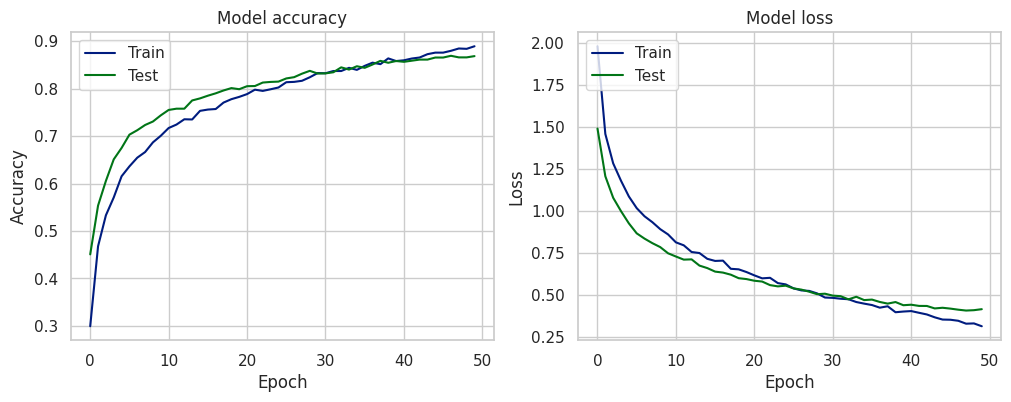

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

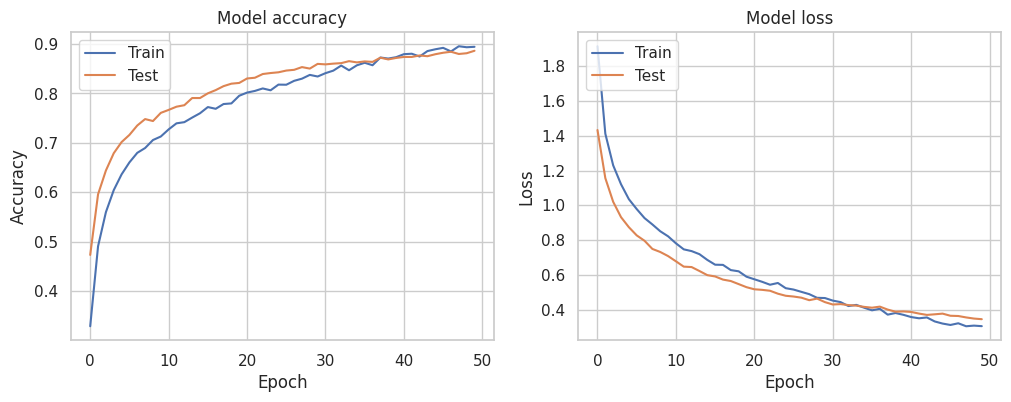

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

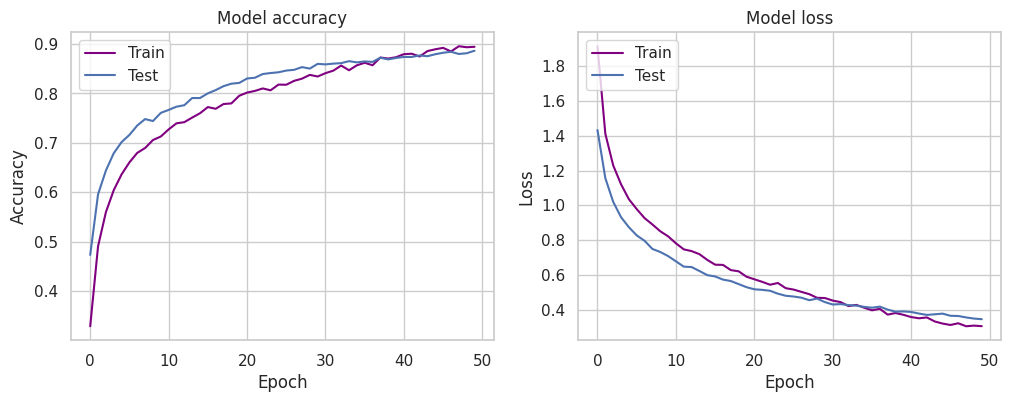

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history75.history['accuracy'], color='purple')
plt.plot(history75.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history75.history['loss'], color='purple')
plt.plot(history75.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

94/94 [==============================] - 0s 4ms/step


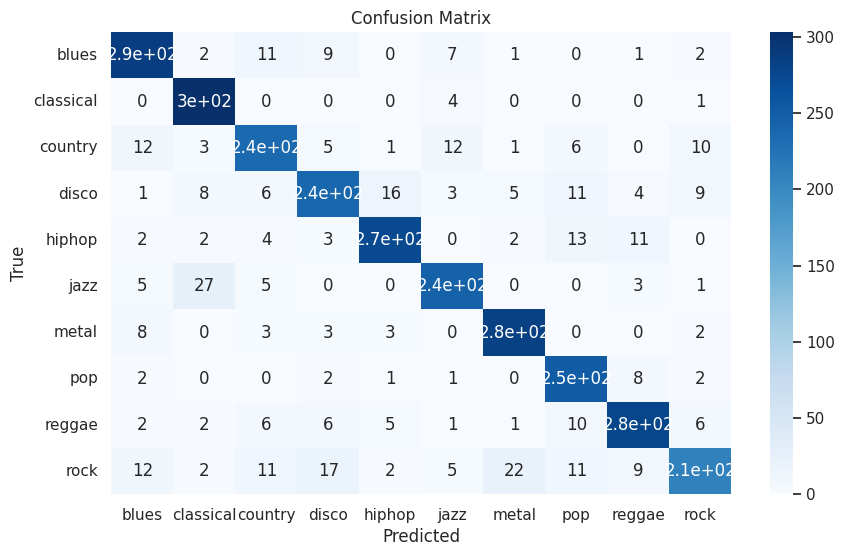

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_30)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
confusion_matr = confusion_matrix(y_test_30, y_pred_classes) #normalize = 'true'
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

63/63 [==============================] - 0s 2ms/step


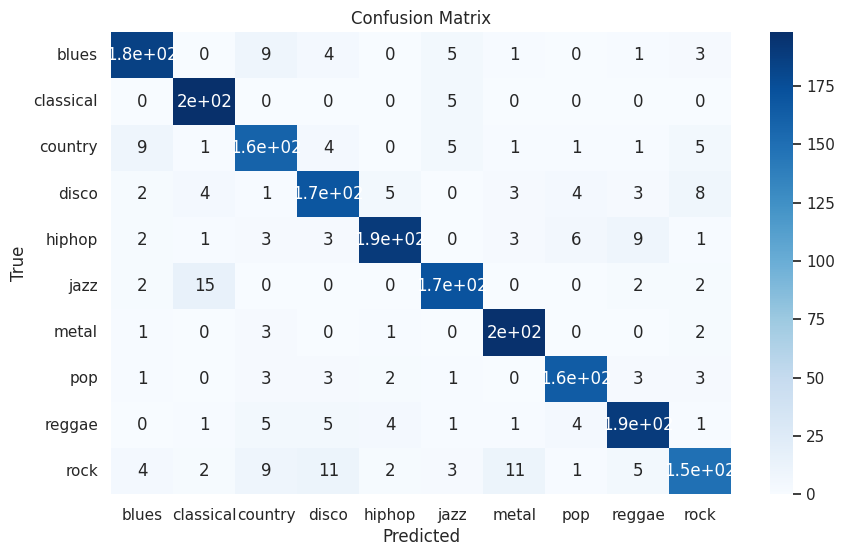

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_20)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
confusion_matr = confusion_matrix(y_test_20, y_pred_classes) #normalize = 'true'
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

79/79 [==============================] - 0s 2ms/step


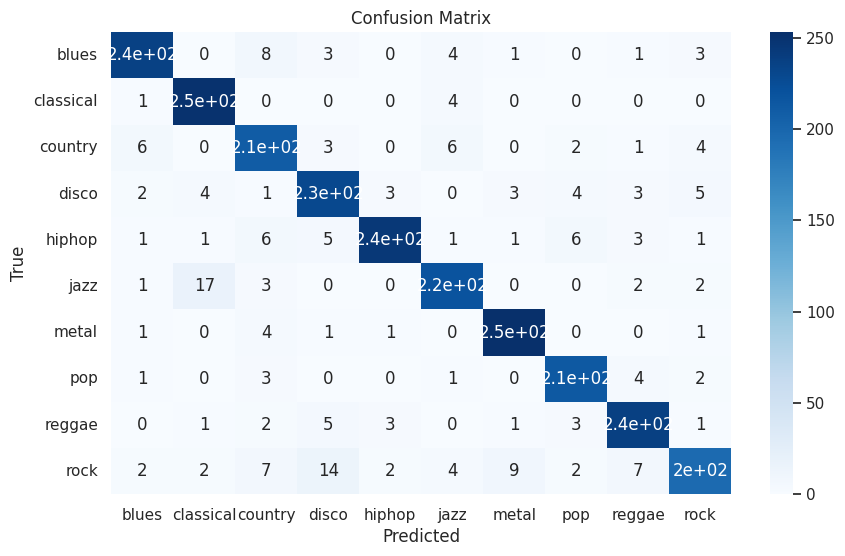

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_25)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
confusion_matr = confusion_matrix(y_test_25, y_pred_classes) #normalize = 'true'
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matr, cmap="Blues", annot=True,
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()